In [1]:
import numpy as np

In [3]:
data = np.load(r'D:\博士工作\第三篇论文_MHW_AI\data\WEIO\expand_WEIO\last\optimized_formula_all_variables_expand_WEIO_surface_deepchazhi_1.npz')
print(data.files) # ['sst_obser', 'slfh', 'sshf', 'ssr', 'str', 'mld', 'analysis_temp', 'u', 'v', 'T_d', 'u_d', 'v_d', 'xx', 'yy', 'dT_dt', 'dT_dx', 'dT_dy']

['slfh', 'sshf', 'ssr', 'str', 'sst_obser', 'T_d', 'u_d', 'v_d', 'mld', 'analysis_temp', 'u', 'v', 'dT_dt', 'xx', 'yy', 'dT_dx', 'dT_dy']


In [4]:
slfh = data['slfh'][:]
sshf = data['sshf'][:]
ssr = data['ssr'][:]
str = data['str'][:]

mld = data['mld'][:]

In [43]:
Qnet = (sshf + slfh + ssr + str)/1000

In [44]:
Qdsw = ssr / 100

In [45]:
def t_surfaceforcing(Qnet, Qdsw, mld, *args):
    # Description - surface forcing term of heat budget
    # input
    # Qnet - 3D daily net air-sea heat flux data to calculate surface forcing term of heat budget, specified as a
    #   three dimensions matrix m-by-n-by-t. m and n separately indicate two spatial dimensions
    #   and t indicates temporal dimension.
    # Qdsw - 3D daily downward shortwave radiation data to calculate surface forcing term of heat budget, specified as a
    #   three dimensions matrix m-by-n-by-t. m and n separately indicate two spatial dimensions
    #   and t indicates temporal dimension.
    # mld - 3D daily mixed-layer depth data to calculate surface forcing term of heat budget, specified as a
    #   three dimensions matrix m-by-n-by-t. m and n separately indicate two spatial dimensions
    #   and t indicates temporal dimension.
    # Q & Qdsw & mld must have the same dimensions.
    # rho - seawater density, default is 1025 kg/m3.
    # Cp - seawater heat capacity, default is 3986 J/(kg°C).
    # r, c1, c2 - defaults are 0.58, 0.35, 23, respectively. (Paulson and Simpon, 1977)
    # output
    # sf - surface forcing term of heat budget

    paramNames = ['rho', 'Cp', 'r', 'c1', 'c2']
    defaults = [1025, 3986, 0.58, 0.35, 23]

    # Parsing optional arguments
    rho, Cp, r, c1, c2 = defaults[:len(args)] if len(args) > 0 else defaults

    Qd = Qdsw * (r * np.exp(-mld / c1) + (1 - r) * np.exp(
        -mld / c2))  # shortwave radiation penetrating below the mixed layer
    sf0 = (Qnet - Qd) / rho / Cp / mld * 3600 * 24  # unit: °C/day
    sf = (sf0[:, :, :-1] + sf0[:, :, 1:]) / 2

    return sf

In [46]:
Qdsw.shape

(9861, 65, 49)

In [47]:
origin_sf = t_surfaceforcing(Qnet, Qdsw, mld)

In [58]:
origin_sf_case1 = origin_sf[9621:9665,:,:]

In [59]:
origin_sf_mean = np.nanmean(origin_sf_case1, axis = 0)

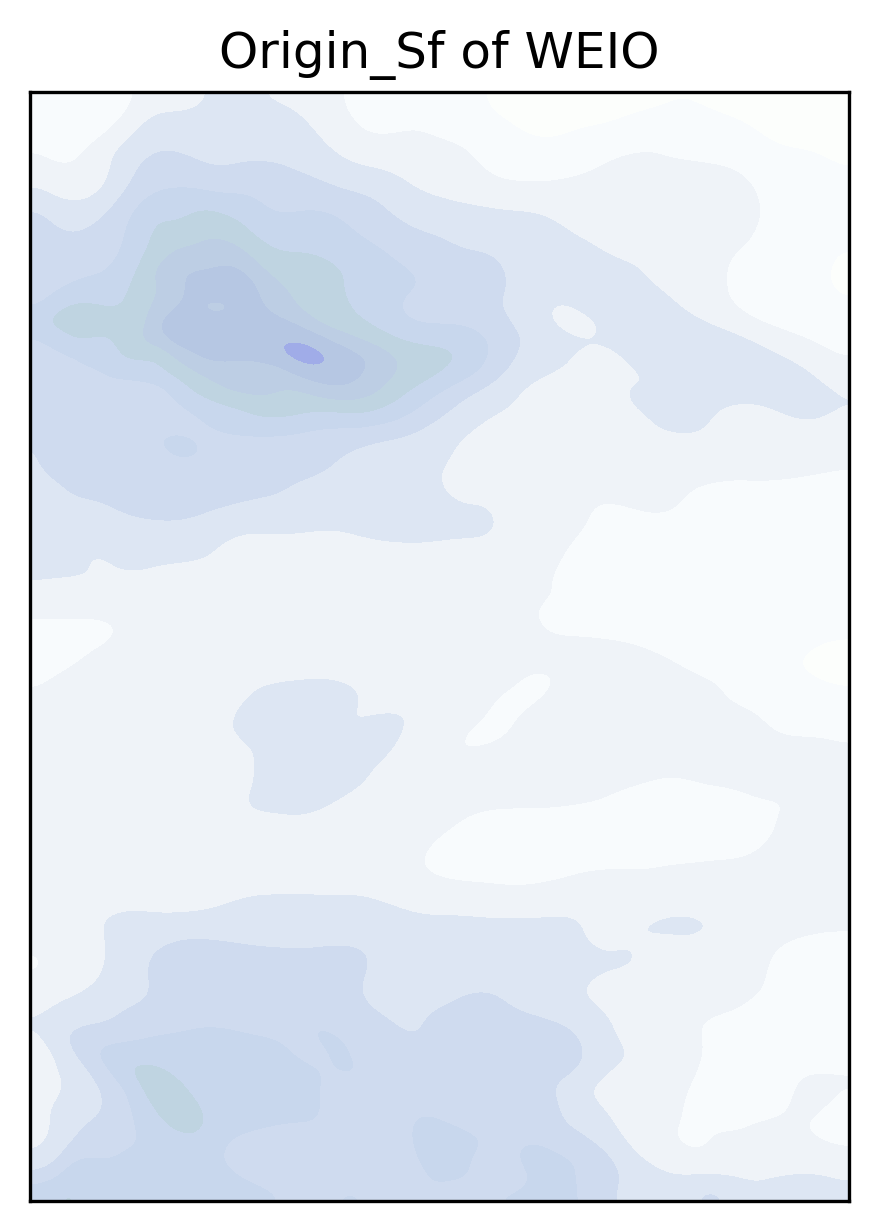

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = origin_sf_mean

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([-5, -4.7, -4.4, -4.1, -3.8, -3.5, -3.2, -2.9, -2.6, -2.3, -2,
                     -1.7, -1.4, -1.1, -0.8, -0.5, 0, 0.5,
                     0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8,
                     4.1, 4.4, 4.7, 5], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, interpolation='bicubic', alpha=0.8)

# Add the color bar with the custom color map

# cbar = plt.colorbar(sm, shrink=0.85)
# cbar.set_ticks([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom ticks
# cbar.set_ticklabels([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom tick labels

# # 设置x轴刻度位置和标签
# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E'])  # 设置刻度的位置和标签
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N'])  # 设置刻度的位置和标签
plt.xticks([])
plt.yticks([])

plt.title('Origin_Sf of WEIO')

# cbar.set_label('℃/day', rotation=0, labelpad=-40)  # 添加单位
# cbar.ax.yaxis.set_label_coords(0.7, -0.03)

# 设置x和y轴的刻度线朝内
plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

In [52]:
np.nanmean(origin_sf_mean)

-2.5836631798088425

In [53]:
np.nanmin(origin_sf_mean)

-3.948766512200756

In [62]:
data_op1 = np.load(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\optimized_Sf1.npz')
data_op2 = np.load(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\optimized_Sf2.npz')
data_op3 = np.load(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\optimized_Sf3.npz')
data_op4 = np.load(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\optimized_Sf4.npz')
data_op5 = np.load(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\optimized_Sf5.npz')

In [64]:
Op_Adv1= data_op1['optimized_Adv'][:]
Op_Adv2= data_op2['optimized_Adv'][:]
Op_Adv3= data_op3['optimized_Adv'][:]
Op_Adv4= data_op4['optimized_Adv'][:]
Op_Adv5= data_op5['optimized_Adv'][:]

In [67]:
Op_Adv1.shape

(1976, 1, 64, 48)

In [68]:
Op_Adv = np.concatenate((Op_Adv1,Op_Adv2, Op_Adv3, Op_Adv4, Op_Adv5), axis = 1)
Op_Adv.shape

(1976, 5, 64, 48)

In [69]:
Op_Adv_mean = np.nanmean(Op_Adv, axis = (0,1))
Op_Adv_mean.shape

(64, 48)

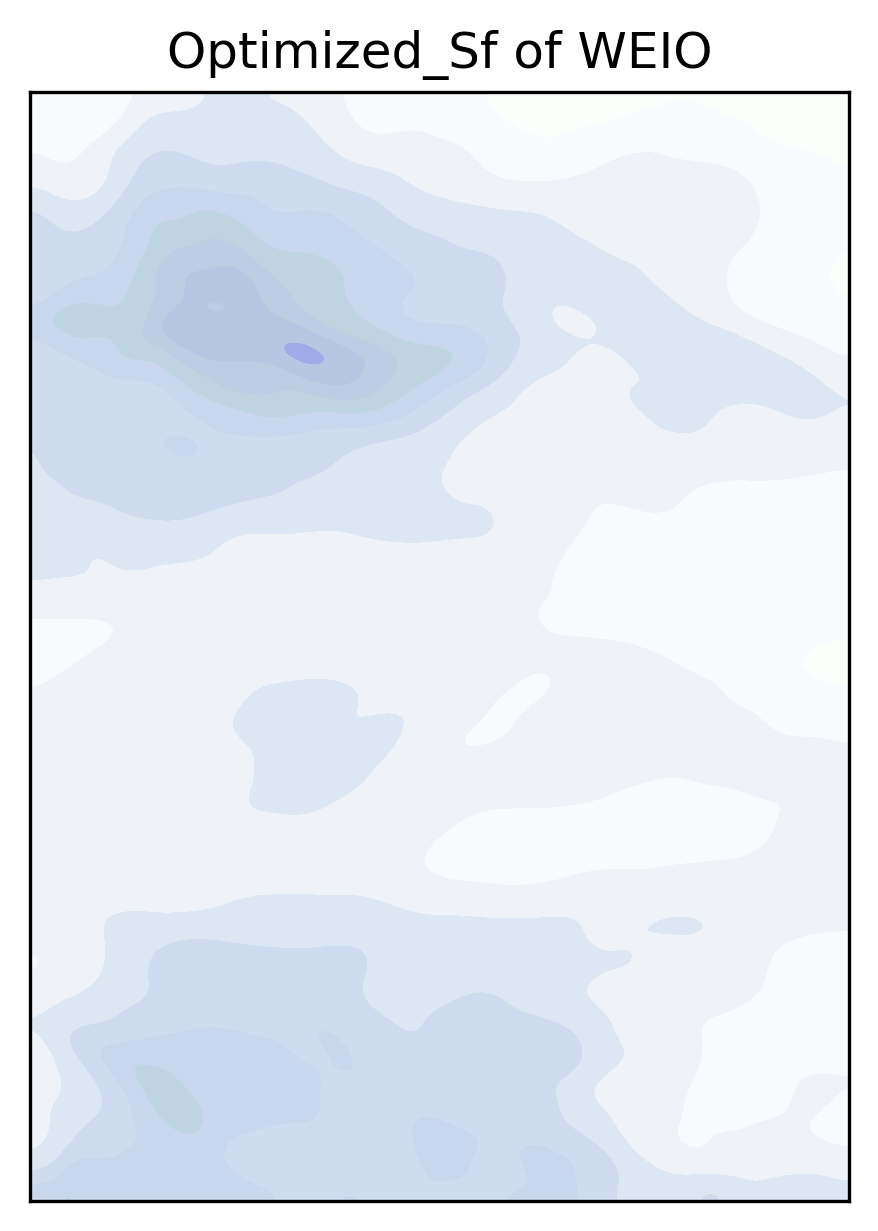

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.cm as cm

# Create a 2D array of random numbers
data = origin_sf_mean

plt.figure(dpi=300)  # Set the dpi value

colors = ['#b9c4d8', '#a6b4cc', '#8ca5dc', '#8897e3', '#a4badc', '#adc2de', '#b0cada', '#bbcde9',
'#c3d2eb', '#d5e0f0', '#ebf1f7', '#f7fbfd', '#fcfefc', '#fdfdfe', '#fdfdfe', '#fefefe',
'#fff8f2','#fffaf3', '#fff4ea', '#ffeacc', '#ffd9c1', '#ffcfae', '#ffbf9e', '#ffbfa0',
'#f7aba0', '#f3a89a', '#f0a093', '#eb998c', '#e69185', '#e68b7e', '#db6f6d', '#da6e6d',
'#d26967', '#c9615d'
          ]
cmap_custom = ListedColormap(colors)
cmap_custom.set_bad(color='lightgrey')  # set the color for NaN values to lightgrey

# Create a ScalarMappable with a normalized color map
norm = BoundaryNorm([-5, -4.7, -4.4, -4.1, -3.8, -3.5, -3.2, -2.9, -2.6, -2.3, -2,
                     -1.7, -1.4, -1.1, -0.8, -0.5, 0, 0.5,
                     0.8, 1.1, 1.4, 1.7, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8,
                     4.1, 4.4, 4.7, 5], cmap_custom.N)
sm = cm.ScalarMappable(cmap=cmap_custom, norm=norm)
sm.set_array([])

plt.imshow(data, cmap=cmap_custom, norm=norm, interpolation='bicubic', alpha=0.8)

# Add the color bar with the custom color map

# cbar = plt.colorbar(sm, shrink=0.85)
# cbar.set_ticks([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom ticks
# cbar.set_ticklabels([-1.5, -0.025, 0, 0.025, 1.5])  # Optional: Set custom tick labels

# # 设置x轴刻度位置和标签
# plt.xticks([0, 60, 120, 180, 240], ['105°E', '110°E', '115°E', '120°E', '125°E'])  # 设置刻度的位置和标签
# plt.yticks([0, 60, 120, 180, 240], ['25°N', '20°N', '15°N', '10°N', '5°N'])  # 设置刻度的位置和标签
plt.xticks([])
plt.yticks([])

plt.title('Optimized_Sf of WEIO')

# cbar.set_label('℃/day', rotation=0, labelpad=-40)  # 添加单位
# cbar.ax.yaxis.set_label_coords(0.7, -0.03)

# 设置x和y轴的刻度线朝内
plt.tick_params(axis='x', direction='in', length=2, width=1, colors='k', grid_color='r')
plt.tick_params(axis='y', direction='in', length=2, width=1, colors='k', grid_color='r')

plt.show()

In [75]:
np.savez(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\Origin_Sf.npz',
        Origin_Sf = origin_sf_mean)

In [76]:
np.savez(r'C:\Users\mymylove\Desktop\论文相关\第三篇论文_HeatWave\WEIO\figure_case1\Optimized_Sf.npz',
        Optimized_Sf = origin_sf_mean)